In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm.notebook import tqdm

In [2]:
L = 30 
N = 10000 
J = 1 

config_1 = np.random.choice([-1,1], size = (L,L), p = [1/2,1/2])

config_2 = np.ones((L,L))

In [3]:
def delta_E(config, L, J, i, j):
    if i > 0 and i < L-1 and j > 0 and j < L-1:
        return -2 * (-J) * config[i,j] * (config[i-1,j] + config[i,j-1] + config[i+1,j] + config[i,j+1])
    
    elif i == 0 and j > 0 and j < L-1:
        return -2 * (-J) *  config[i,j] * (config[i,j-1] + config[i+1,j] + config[i,j+1])
    
    elif i == L - 1 and j > 0 and j < L-1:
        return -2 * (-J) * config[i,j] * (config[i-1,j] + config[i,j-1] +  config[i,j+1]) 

    elif j == 0 and i > 0 and i < L-1 :
        return -2 * (-J) * config[i,j] * (config[i-1,j] + config[i+1,j] + config[i,j+1]) 

    elif j == L-1 and i > 0 and i < L-1 : 
        return -2 * (-J) * config[i,j] * (config[i-1,j] + config[i,j-1] + config[i+1,j]) 

    elif i == 0 and j == 0: 
        return -2 * (-J) * config[i,j] * (config[i+1,j] + config[i,j+1]) 

    elif i == 0 and j == L-1: 
        return -2 * (-J) * config[i,j] * (config[i,j-1] + config[i+1,j]) 

    elif i == L-1 and j == 0: 
        return -2 * (-J) * config[i,j] * (config[i-1,j] + config[i,j+1]) 

    elif i == L-1 and j == L-1: 
        return -2 * (-J) * config[i,j] * (config[i-1,j] + config[i,j-1]) 

    else : 
        print (i,j)

def delta_E2(config, L, J, i, j):
    return -2 * (-J) * config[i,j] * (config[i-1,j]*(i > 0) + config[i,j-1] * (j > 0) + config[i+1,j] * (i< L-1) + config[i,j+1] * (j < L-1))

def Monte_Carlo(N, L, config, J, beta):
    new_config = np.copy(config)
    configs = []
    for n in range(N):
        for l in range(L*L):
            temp_config = np.copy(new_config)
            i = np.random.randint(L)
            j = np.random.randint(L)
            temp_config[i,j] = -1 * temp_config[i,j]
            delta_e = delta_E(new_config, L, J, i, j)

            # r = np.random.random_sample()
            # p = np.exp(-1 * beta * delta_e)
            if delta_e < 0 :
                new_config = np.copy(temp_config)
            elif np.random.random_sample() <=  np.exp(-1 * beta * delta_e): 
                new_config = np.copy(temp_config)

          
        if n % 100 == 0:
            configs.append(new_config)

    return np.mean(configs)

In [7]:
res2 = []

for i in tqdm(range(100)):
    beta =  i * 0.01
    temp = Monte_Carlo(N, L, config_1, J, beta)
    res2.append(temp)
    print(temp)

0.0007555555555555555
0.0017777777777777779
0.004177777777777778
-0.0006
0.0020666666666666667
0.007022222222222222
0.00022222222222222223
0.00046666666666666666
-0.00017777777777777779
0.0004
-0.005755555555555555
-0.0023777777777777777
-0.008088888888888889
0.0038666666666666667
-0.0026
0.0006222222222222223
-0.0005555555555555556
0.0026
-0.00046666666666666666
-0.0023333333333333335
-0.009577777777777777
-0.003533333333333333
-4.4444444444444447e-05
-0.00848888888888889
0.0015777777777777778
0.003511111111111111
-0.011733333333333333
0.0002888888888888889
0.008444444444444444
-0.0023555555555555556
-0.0031777777777777776
0.014
0.0014444444444444444
-0.001
-0.0046
0.004688888888888889
-0.005644444444444444
0.01211111111111111
0.016133333333333333
0.013222222222222222
-0.015155555555555556
-0.03253333333333333
0.0753111111111111
-0.08826666666666666
-0.109
-0.11502222222222222
-0.5020666666666667
-0.6624222222222222
-0.7142888888888889
0.4288666666666667
-0.7991111111111111
-0.8107333

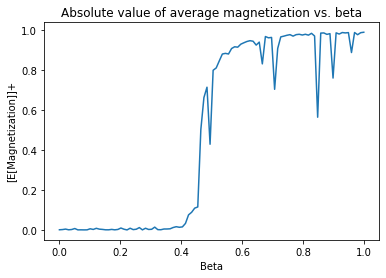

In [8]:
plt.plot(np.linspace(0.0,1.0,num = 100), np.abs(np.array(res2)))
plt.title("Absolute value of average magnetization vs. beta")
plt.ylabel('[E[Magnetization]]+')
plt.xlabel('Beta')
plt.show()

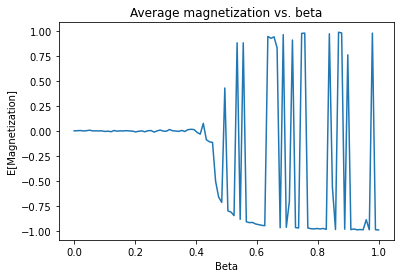

In [9]:
plt.plot(np.linspace(0.0,1.0,num = 100), np.array(res2))
plt.title("Average magnetization vs. beta")
plt.ylabel('E[Magnetization]')
plt.xlabel('Beta')
plt.show()

In [10]:
res = []

for i in tqdm(range(100)):
    beta =  i * 0.01
    temp = Monte_Carlo(N, L, config_2, J, beta)
    res.append(temp)
    print(temp)

8.888888888888889e-05
0.003711111111111111
0.004244444444444445
-0.003022222222222222
-0.0016444444444444445
0.00811111111111111
0.0011111111111111111
0.0034666666666666665
0.00968888888888889
0.0026222222222222224
0.0057777777777777775
0.009488888888888889
0.008844444444444445
0.0009111111111111111
0.0023333333333333335
0.0074
0.018711111111111112
-0.0026
0.012555555555555556
0.006533333333333334
0.002688888888888889
0.006555555555555556
-0.003311111111111111
0.006311111111111111
0.012088888888888889
0.0102
0.017355555555555555
0.010666666666666666
-0.003288888888888889
0.020733333333333333
0.0014
0.0030666666666666668
0.009266666666666666
0.01622222222222222
0.01411111111111111
-0.007688888888888889
0.017955555555555554
-0.012911111111111111
-0.003977777777777778
0.0074
0.03995555555555556
0.010555555555555556
-0.013
0.14295555555555556
-0.042133333333333335
0.18213333333333334
0.19993333333333332
0.6651555555555556
0.7262888888888889
0.7778222222222222
0.8098444444444445
0.842
0.872

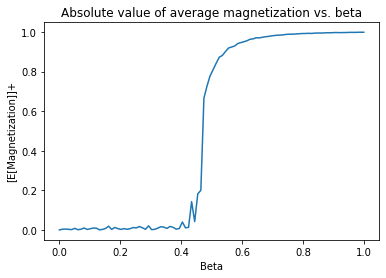

In [11]:
plt.plot(np.linspace(0.0,1.0,num = 100), np.abs(np.array(res)))
plt.title("Absolute value of average magnetization vs. beta")
plt.ylabel('[E[Magnetization]]+')
plt.xlabel('Beta')
plt.show()

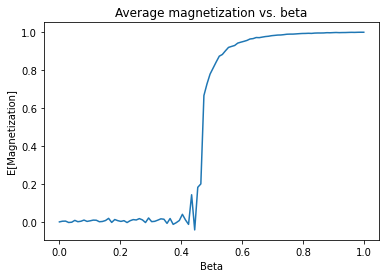

In [12]:
plt.plot(np.linspace(0.0,1.0,num = 100), np.array(res))
plt.title("Average magnetization vs. beta")
plt.ylabel('E[Magnetization]')
plt.xlabel('Beta')
plt.show()